# Trabalho 2 - SVD e recomendação de filmes.         Nícolas Hecker Silva         RA: 186132

A primeira parte importante desse trabalho é baixar as dependencias necessárias usando pip, caso a máquina não as possua. Para isso usamos o código abaixo:

In [3]:
# instalar dependencias
!python -m pip install pandas
!python -m pip install jax
!python -m pip install --upgrade "jax[cuda12_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
!python -m pip install scikit-learn
!python -m pip install matplotlib


Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


# Implementação do SVD:

Através das funções de autovetores e autovalores e comparando com a função própria.

primeiro função própria do jax e do numpy

In [4]:
import jax.numpy as jnp

matrix = jnp.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

U, S, VT = jnp.linalg.svd(matrix, full_matrices=True)

print("Autovetores U:\n", U)
print("Autovalores:\n",S)
print("Autovetores VT:\n",VT)

print("\n================================== Agora com numpy ===========================================\n")
import numpy as np
matriz = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
Un, Sn, VTn = np.linalg.svd(matriz, full_matrices=True)

print("Autovetores U:\n", Un)
print("Autovalores:\n",Sn)
print("Autovetores VT:\n",VTn)


Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [2.5462400e+01 1.2906601e+00 2.8028271e-07]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.40824792]]

================================== Agora com numpy ===========================================

Autovetores U:
 [[-0.14087668 -0.82471435  0.54704904 -0.02715407]
 [-0.34394629 -0.42626394 -0.70915928  0.4439517 ]
 [-0.54701591 -0.02781353 -0.22282857 -0.80644121]
 [-0.75008553  0.37063688  0.38493881  0.38964357]]
Autovalores:
 [2.54624074e+01 1.29066168e+00 1.80972823e-15]
Autovetores VT:
 [[-0.50453315 -0.5745157  -0.64449826]
 [ 0.76077568  0.05714052 -0.64649464]
 [-0.40824829  0.81649658 -0.40824829]]


2024-10-09 10:44:38.470544: W external/xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.6.68. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [5]:
SL = matrix @ matrix.T
SR = matrix.T @ matrix

print("Matriz esquerda:\n",SL)
print("Matriz direita:\n",SR)
    
s1,u = jnp.linalg.eigh(SL)
s2,v = jnp.linalg.eigh(SR)

# se módulo menor que 1e-5, considera zero. Também tira a raiz quadrada
s1 = jnp.where(jnp.abs(s1) < 1e-5, 0, s1)**0.5
s2 = jnp.where(jnp.abs(s2) < 1e-5, 0, s2)**0.5

print("Autovetores esquerda:\n",u)
print("Autovetores direita:\n",v)
print("Autovalores S1:\n",s1)
print("Autovalores S2:\n",s2)

Matriz esquerda:
 [[ 14  32  50  68]
 [ 32  77 122 167]
 [ 50 122 194 266]
 [ 68 167 266 365]]
Matriz direita:
 [[166 188 210]
 [188 214 240]
 [210 240 270]]
Autovetores esquerda:
 [[-0.34394345  0.42626652  0.82471424  0.14087665]
 [ 0.14087537 -0.8247139   0.42626527  0.34394637]
 [ 0.7500866   0.37063494  0.02781123  0.5470159 ]
 [-0.5470166   0.02781428 -0.37063578  0.7500856 ]]
Autovetores direita:
 [[ 0.40824673 -0.7607764   0.50453305]
 [-0.8164966  -0.05713892  0.5745157 ]
 [ 0.4082495   0.6464938   0.6444983 ]]
Autovalores S1:
 [ 0.         0.         1.2906629 25.46241  ]
Autovalores S2:
 [ 0.         1.2906607 25.462406 ]


In [6]:
# obtem os indices para que ordenam os autovalores
idx1 = jnp.argsort(s1)[::-1]
idx2 = jnp.argsort(s2)[::-1]

# ordena os autovalores e autovetores
s1 = s1[idx1]
s2 = s2[idx2]

u = u[:,idx1]
v = v[:,idx2]

print("Autovetores esquerda ordenados:\n",u)
print("Autovetores direita ordenados transposto:\n",v.T)
print("Autovalores S1 ordenados:\n",s1)
print("Autovalores S2 ordenados:\n",s2)

print("\n ==================== comapração com SVD nativo =====================\n")

print("Autovetores U:\n", U)
print("Autovalores:\n",jnp.where(jnp.abs(S) < 1e-5, 0, S))
print("Autovetores VT:\n",VT)



Autovetores esquerda ordenados:
 [[ 0.14087665  0.82471424  0.42626652 -0.34394345]
 [ 0.34394637  0.42626527 -0.8247139   0.14087537]
 [ 0.5470159   0.02781123  0.37063494  0.7500866 ]
 [ 0.7500856  -0.37063578  0.02781428 -0.5470166 ]]
Autovetores direita ordenados transposto:
 [[ 0.50453305  0.5745157   0.6444983 ]
 [-0.7607764  -0.05713892  0.6464938 ]
 [ 0.40824673 -0.8164966   0.4082495 ]]
Autovalores S1 ordenados:
 [25.46241    1.2906629  0.         0.       ]
Autovalores S2 ordenados:
 [25.462406   1.2906607  0.       ]

 ==================== comapração com SVD nativo =====================

Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [25.4624     1.2906601  0.       ]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.

In [7]:
def svd(matrix):
    SL = matrix @ matrix.T
    SR = matrix.T @ matrix

    s1,u = jnp.linalg.eigh(SL)
    s2,v = jnp.linalg.eigh(SR)

    # se módulo menor que 1e-5, considera zero. Também tira a raiz quadrada
    s1 = jnp.where(jnp.abs(s1) < 1e-5, 0, s1)**0.5
    s2 = jnp.where(jnp.abs(s2) < 1e-5, 0, s2)**0.5

    # obtem os indices para que ordenam os autovalores
    idx1 = jnp.argsort(s1)[::-1]
    idx2 = jnp.argsort(s2)[::-1]

    # ordena os autovalores e autovetores
    s1 = s1[idx1]
    s2 = s2[idx2]

    u = u[:,idx1]
    v = v[:,idx2]

    return u,s1,v.T

u, s, vt = svd(matrix)
print("Autovetores U:\n", u)
print("Autovalores:\n",s)
print("Autovetores VT:\n",vt)

print("\n================================== Última comparação com o oficial ===========================================\n")

print("Autovetores U:\n", U)
print("Autovalores:\n",jnp.where(jnp.abs(S) < 1e-5, 0, S))
print("Autovetores VT:\n",VT)

Autovetores U:
 [[ 0.14087665  0.82471424  0.42626652 -0.34394345]
 [ 0.34394637  0.42626527 -0.8247139   0.14087537]
 [ 0.5470159   0.02781123  0.37063494  0.7500866 ]
 [ 0.7500856  -0.37063578  0.02781428 -0.5470166 ]]
Autovalores:
 [25.46241    1.2906629  0.         0.       ]
Autovetores VT:
 [[ 0.50453305  0.5745157   0.6444983 ]
 [-0.7607764  -0.05713892  0.6464938 ]
 [ 0.40824673 -0.8164966   0.4082495 ]]

================================== Última comparação com o oficial ===========================================

Autovetores U:
 [[ 0.14087664  0.82471395  0.46999776  0.2812515 ]
 [ 0.34394628  0.42626432 -0.8362956  -0.02468661]
 [ 0.5470158   0.02781341  0.2625992  -0.7943813 ]
 [ 0.75008535 -0.37063694  0.10369895  0.5378164 ]]
Autovalores:
 [25.4624     1.2906601  0.       ]
Autovetores VT:
 [[ 0.5045332   0.5745157   0.64449817]
 [-0.7607754  -0.05714092  0.64649487]
 [ 0.40824872 -0.81649655  0.40824792]]


In [8]:
# get the dataset of https://files.grouplens.org/datasets/movielens/ml-100k.zip if not exists
import os
if not os.path.exists('dataset-t2/ml-100k'):
    !wget https://files.grouplens.org/datasets/movielens/ml-100k.zip
    !unzip ml-100k.zip -d dataset-t2/
    # remove the zip file
    !rm ml-100k.zip

Os conjuntos preprocessados, possuem todos os sujeitos no treino. Entretanto isso não é interessante para a tarefa, uma vez que queremos prever as avaliacoes para um novo sujeito. Logo, precisamos fazer nosso próprio particionamento.

In [9]:
# carrega com pandas o dataset u1 separado por tabs
import pandas as pd

# carrega o dataset de avaliações
complete = pd.read_csv('dataset-t2/ml-100k/u.data', sep='\t', header=None)
complete.columns = ['user_id', 'movie_id', 'rating', 'timestamp']

complete


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [10]:
# seleciona aleatoriamente 80% dos usuarios para treino e os demais para teste
np.random.seed(42)
users = complete.user_id.unique()
np.random.shuffle(users)
train_users = users[:int(0.8*len(users))]
test_users = users[int(0.8*len(users)):]
print("Numero de usuarios para treino:",len(train_users))
print("Numero de usuarios para teste:",len(test_users))

print(sorted(train_users)[:5])
print(sorted(test_users)[:5])

Numero de usuarios para treino: 754
Numero de usuarios para teste: 189
[np.int64(1), np.int64(2), np.int64(4), np.int64(5), np.int64(6)]
[np.int64(3), np.int64(13), np.int64(43), np.int64(45), np.int64(46)]


In [11]:
# com base nos train_users e test_users, separa os dados de treino e teste
train_raw = complete[complete.user_id.isin(train_users)]
test_raw = complete[complete.user_id.isin(test_users)]

print("Numero de avaliações para treino:",len(train_raw))
print("Numero de avaliações para teste:",len(test_raw))

Numero de avaliações para treino: 79186
Numero de avaliações para teste: 20814


In [12]:
train_raw

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
2,22,377,1,878887116
3,244,51,2,880606923
5,298,474,4,884182806
6,115,265,2,881171488
...,...,...,...,...
99993,913,209,2,881367150
99994,378,78,3,880056976
99996,716,204,5,879795543
99997,276,1090,1,874795795


próximo a 80000 amostras

In [13]:
test_raw

,user_id,movie_id,rating,timestamp
1,186,302,3,891717742
4,166,346,1,886397596
13,210,40,3,891035994
14,224,29,3,888104457
20,119,392,4,886176814
...,...,...,...,...
99987,660,229,2,891406212
99988,421,498,4,892241344
99989,495,1091,4,888637503
99995,880,476,3,880175444


próximo a 20000 amostras

Agora constroi a tabelona

In [14]:
# cria a matriz de avaliações
# a linha da matriz de treino é o usuario, a coluna é o filme, e o valor é a avaliação. Se não houver avaliação, é NaN
train = train_raw.pivot(index='user_id', columns='movie_id', values='rating')
test = test_raw.pivot(index='user_id', columns='movie_id', values='rating')

print("Matriz de treino:",train.shape)
print("Matriz de teste:",test.shape)

Matriz de treino: (754, 1646)
Matriz de teste: (189, 1438)


In [15]:
train

movie_id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test

movie_id,1,2,3,4,5,6,7,8,9,10,...,1625,1627,1628,1639,1652,1653,1655,1661,1664,1674
user_id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,3.0,3.0,NaN,5.0,1.0,NaN,2.0,4.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,5.0,NaN,2.0,4.0,4.0,NaN,4.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Aqui podemos ver que há diversos pontos NaN no dataset. No dataset de treino será necessário completar os dados para que o modelo possa executar corretamente. No dataset de teste será considerado qualquer chute correto quando comparado com o NaN.

Para preencher os dados faltantes no treino, inicialmente será utilizado a mediana das avaliações de cada filme. Assim um usuário que não votou em um filme, terá a nota desse filme igual a mediana de todos os votos nesse filme.

Vamor primeiro testar a operação em uma pequena mattriz do mesmo tipo

In [17]:
# preenche os valores NaN com a mediana de suas respectivas colunas
temp = np.array([[1, np.nan, 3], [4, 5, np.nan,], [7, 8, 9], [10, 11, np.nan,]])
temp = pd.DataFrame(temp)
print (temp, "\n\n##################\n")
temp = temp.fillna(temp.median())
print (temp)

      0     1    2
0   1.0   NaN  3.0
1   4.0   5.0  NaN
2   7.0   8.0  9.0
3  10.0  11.0  NaN 

##################

      0     1    2
0   1.0   8.0  3.0
1   4.0   5.0  6.0
2   7.0   8.0  9.0
3  10.0  11.0  6.0


In [18]:
train_nan = train
train = train_nan.fillna(train_nan.median(axis=0))
train


movie_id,1,2,3,4,5,6,7,8,9,10,...,1672,1673,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
2,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,2.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
4,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
5,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
6,4.0,3.0,3.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,5.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
940,4.0,3.0,3.0,2.0,3.0,4.0,4.0,5.0,3.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
941,5.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,...,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


Agora que a matriz foi calculada, é possível calcular o SVD para obter as matrizes singulares que definem esse dataset

In [19]:
# transforma a matriz de treino em um array jax para realizar a decomposição SVD por função própria
# uma vez que a função não foi montada para pandas
train_array = jnp.array(train.values)

print("Matriz de treino shape:",train_array.shape)
print("Matriz de treino:",train_array)

# normaliza a matriz de treino dividindo por 5, a maior avaliação possível
train_array = train_array / 5


Matriz de treino shape: (754, 1646)
Matriz de treino: [[5. 3. 4. ... 2. 3. 3.]
 [4. 3. 3. ... 2. 3. 3.]
 [4. 3. 3. ... 2. 3. 3.]
 ...
 [5. 3. 3. ... 2. 3. 3.]
 [4. 3. 3. ... 2. 3. 3.]
 [4. 5. 3. ... 2. 3. 3.]]


In [20]:

U, S, VT = svd(train_array)
print("Autovetores U shape:\n", U.shape)
print("Autovalores shape:\n",S.shape)
print("Autovetores VT shape:\n",VT.shape)

Autovetores U shape:
 (754, 754)
Autovalores shape:
 (754,)
Autovetores VT shape:
 (1646, 1646)


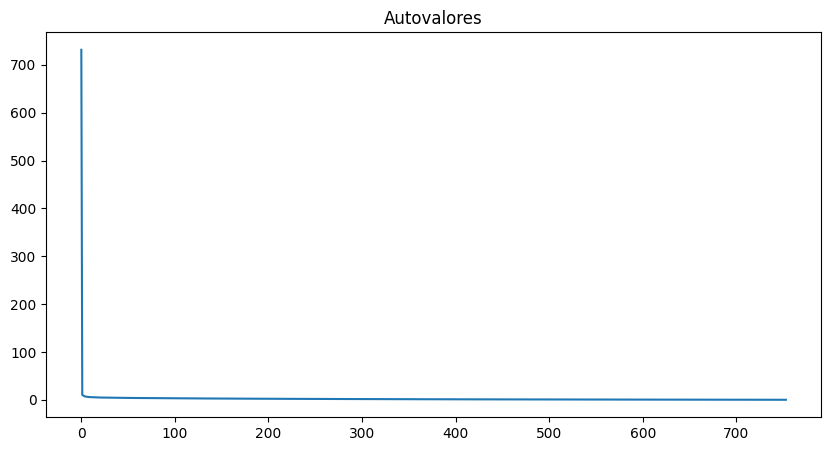

In [21]:
# plota os autovalores S
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(S)
plt.title("Autovalores")
plt.show()

Text(0.5, 1.0, 'Autovalores')

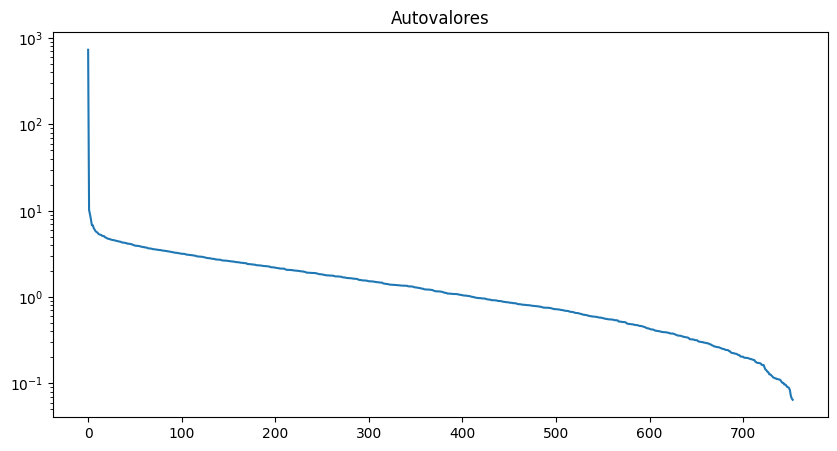

In [22]:
# plota novamente em escala loagaritmica
plt.figure(figsize=(10,5))
plt.plot(S)
plt.yscale('log')
plt.title("Autovalores")

Text(0.5, 1.0, 'Autovalores')

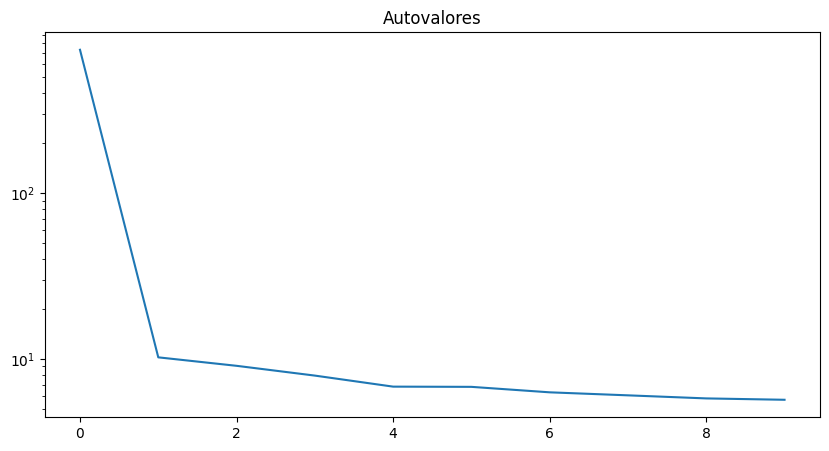

In [23]:
# plota novamente em escala loagaritmica
plt.figure(figsize=(10,5))
plt.plot(S[:10])
plt.yscale('log')
plt.title("Autovalores")

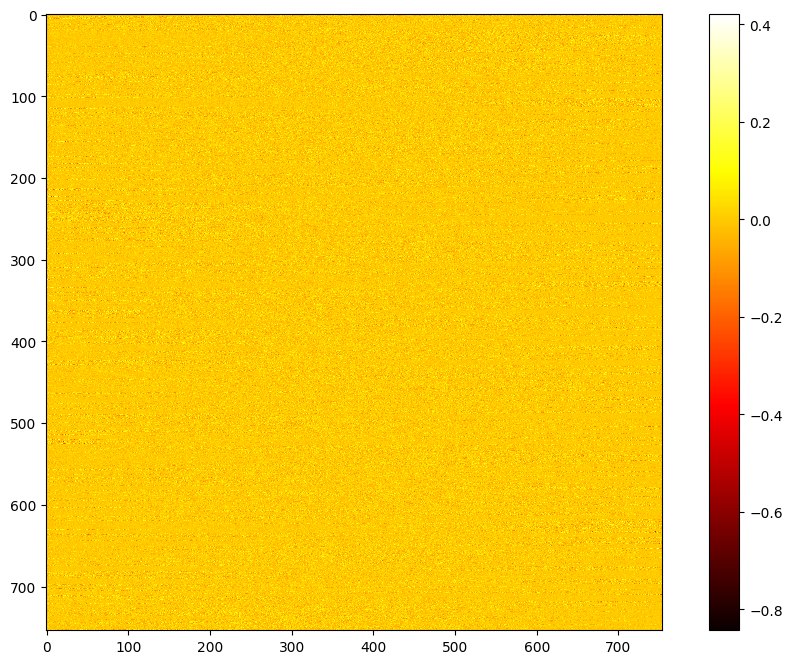

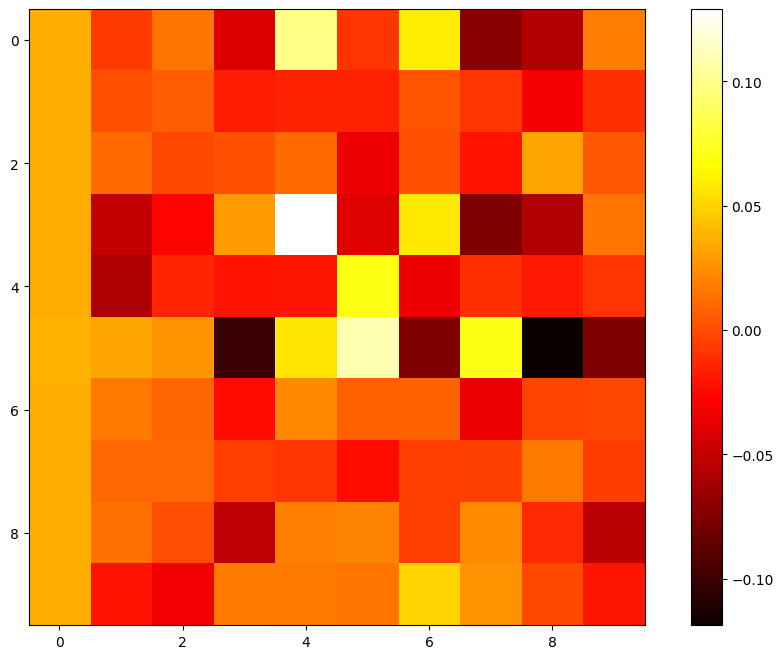

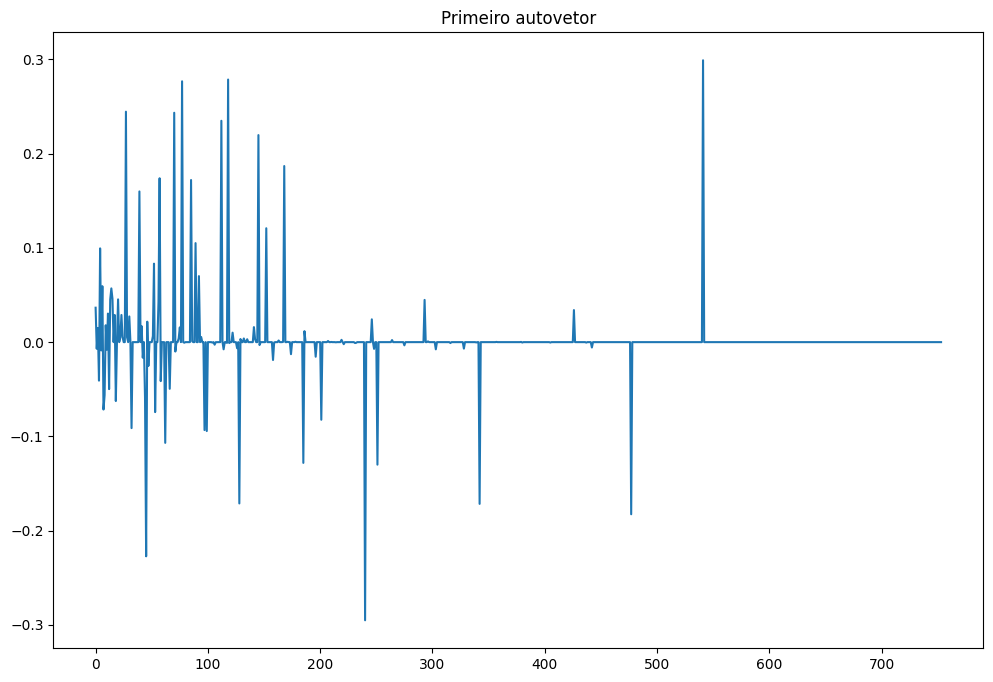

In [24]:
# mostra um mapa de calor dos autovetores U
plt.figure(figsize=(12, 8))
plt.imshow(U, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra um mapa de calor dos autovalores U recortado
plt.figure(figsize=(12, 8))
plt.imshow(U[:10,:10], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(U[0])
plt.title("Primeiro autovetor")
plt.show()



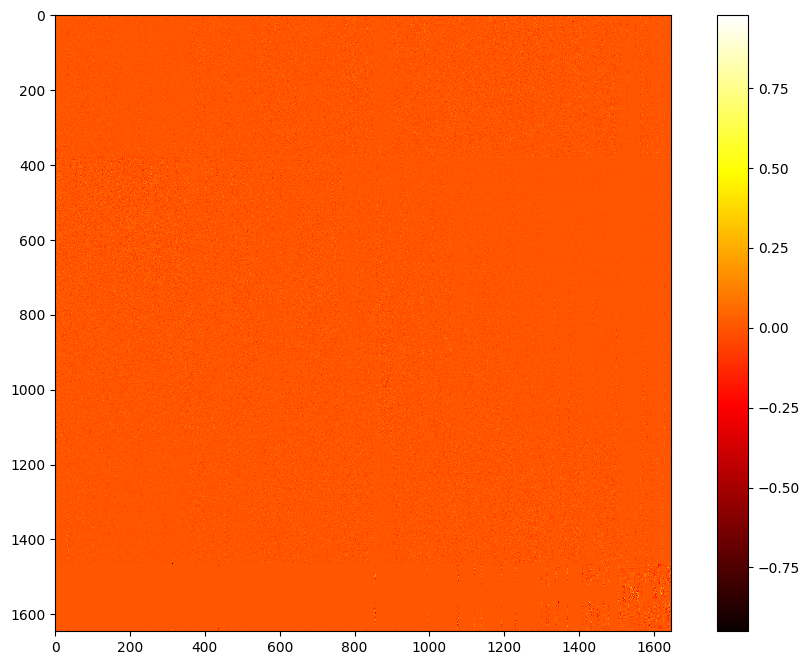

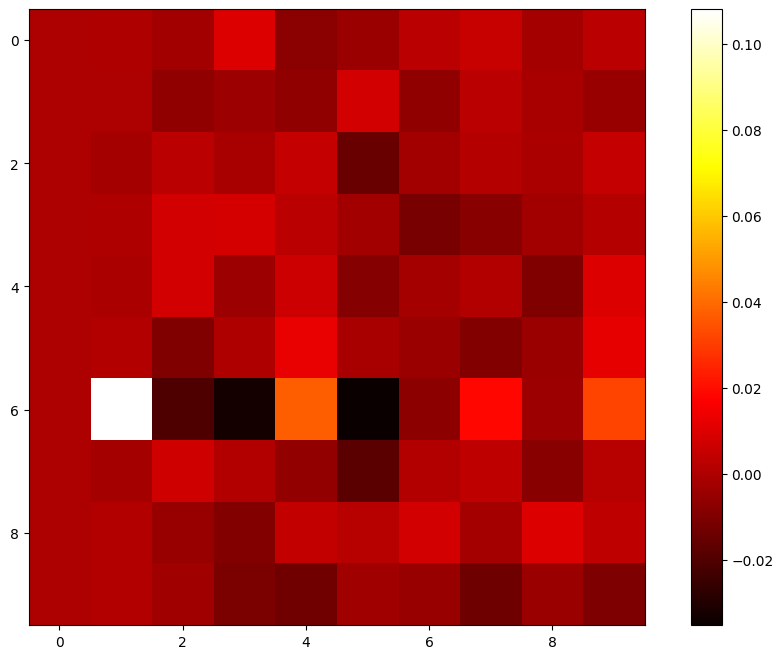

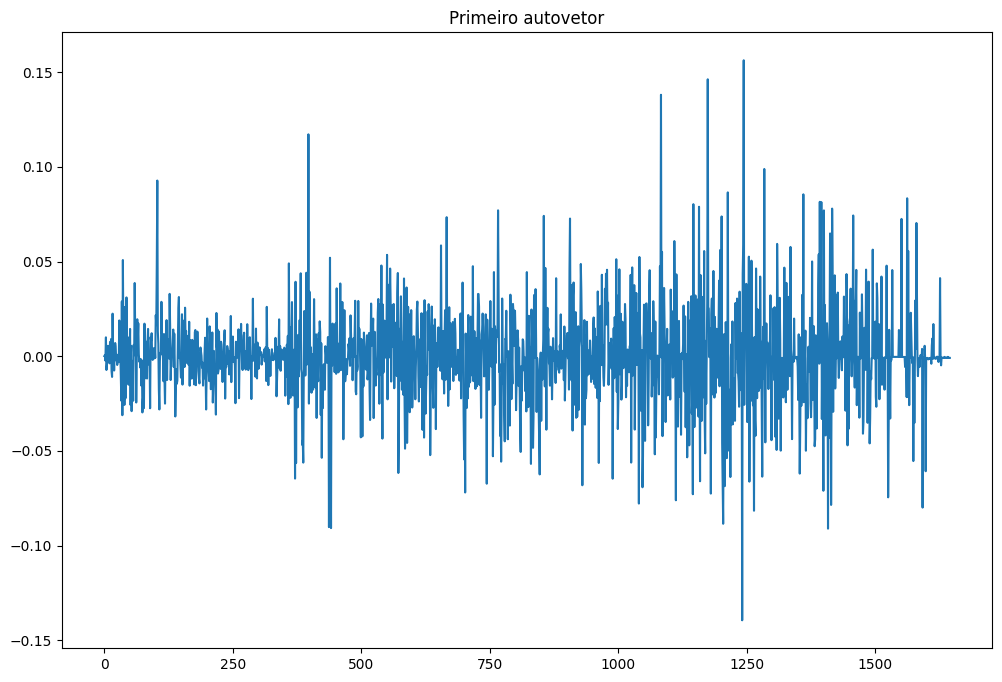

In [25]:
# mostra um mapa de calor dos autovetores VT
plt.figure(figsize=(12, 8))
plt.imshow(VT, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra um mapa de calor dos autovalores VT recortado
plt.figure(figsize=(12, 8))
plt.imshow(VT[:10,:10], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(VT[0])
plt.title("Primeiro autovetor")
plt.show()


In [26]:
# multiplica as matrizes U, S e VT para obter a matriz original
S_dig = jnp.diag(S)
# adiciona colunas nulas em S para que seja possível multiplicar por VT
S_dig = jnp.hstack([S_dig, jnp.zeros((S_dig.shape[0], VT.shape[0] - S_dig.shape[0]))])
reconstruida = U @ S_dig @ VT

print(reconstruida.shape)

(754, 1646)


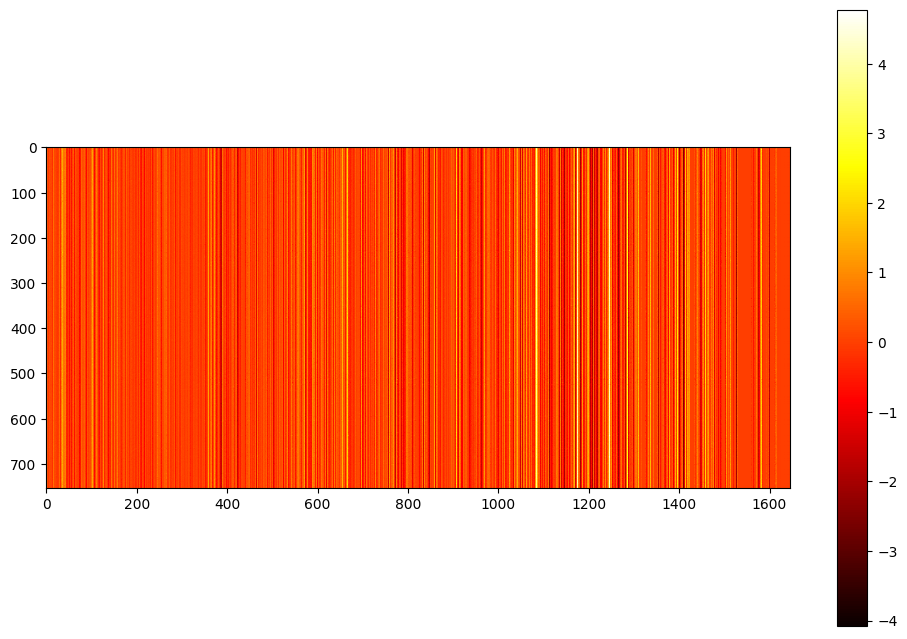

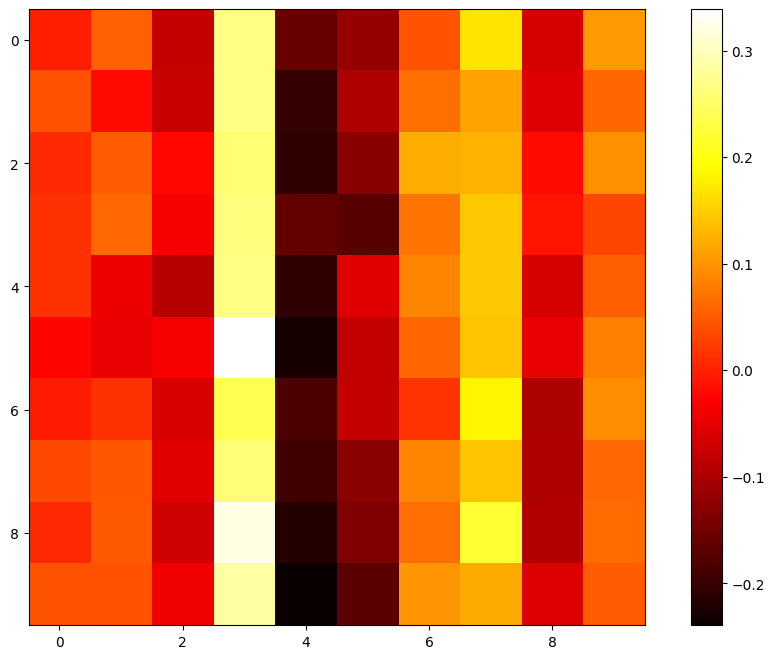

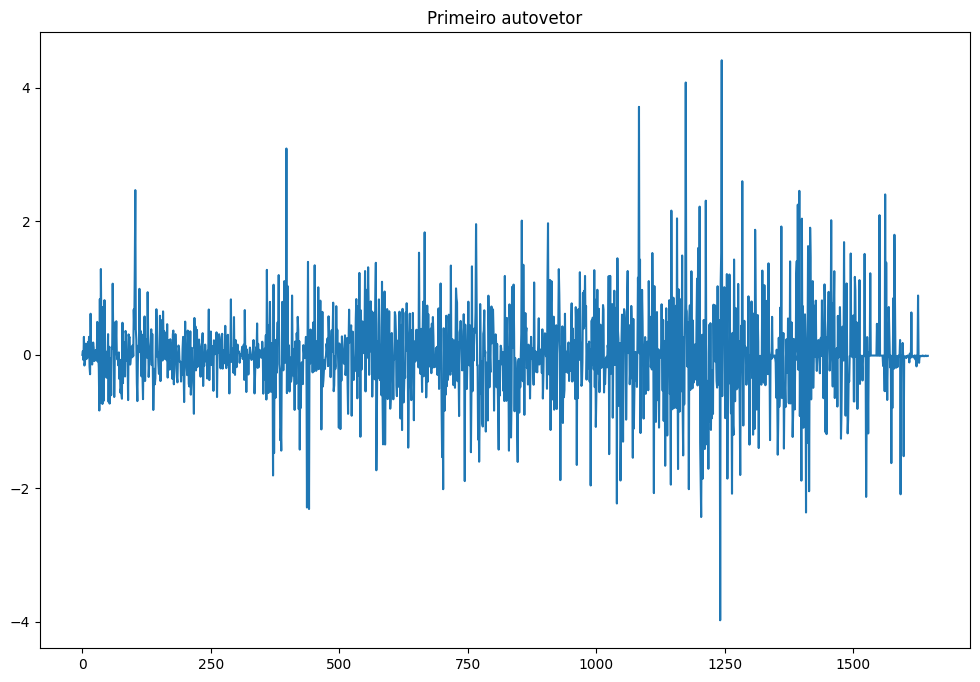

In [27]:
# mostra um mapa de calor de reconstruida
plt.figure(figsize=(12, 8))
plt.imshow(reconstruida, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# mostra um mapa de calor de reconstruida recortado
plt.figure(figsize=(12, 8))
plt.imshow(reconstruida[:10,:10], cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

# plota o primeiro valor de reconstruida
plt.figure(figsize=(12, 8))
plt.plot(reconstruida[0])
plt.title("Primeiro autovetor")
plt.show()


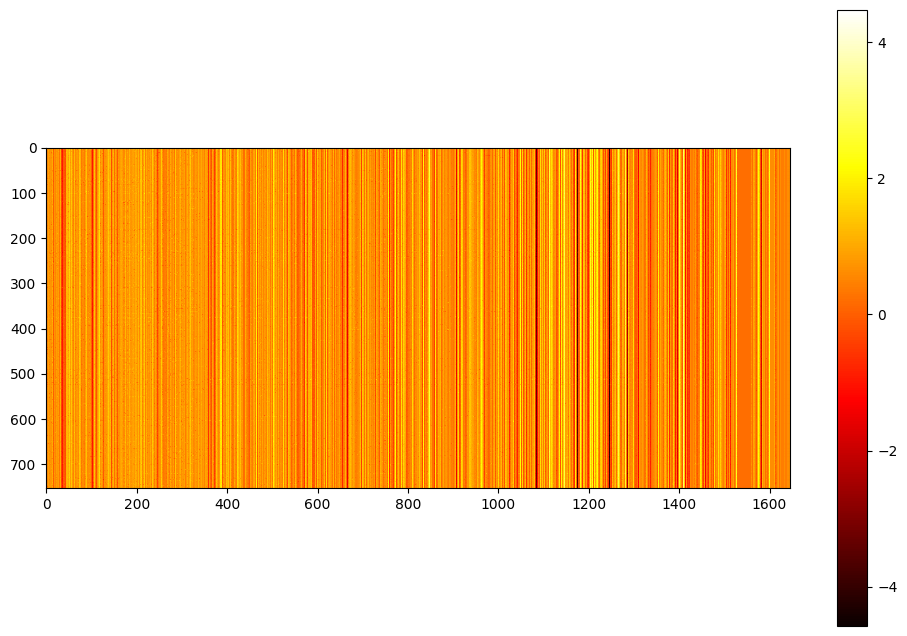

In [28]:
diferenca = train_array - reconstruida

# mostra o mapa de calor da diferença
plt.figure(figsize=(12, 8))
plt.imshow(diferenca, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()